# Построение и анализ моделей беспроводных сетей 5G/6G
## Практическая работа №1
### Модели распространения

Быстров Глеб Андреевич
НФИмд-01-24
1132249517

**Модель распространения FSPL**

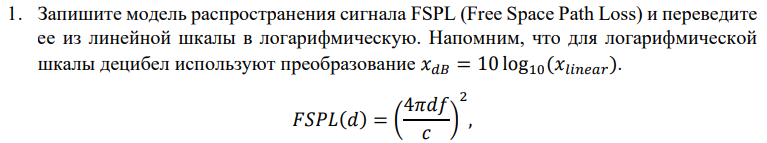

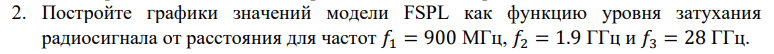

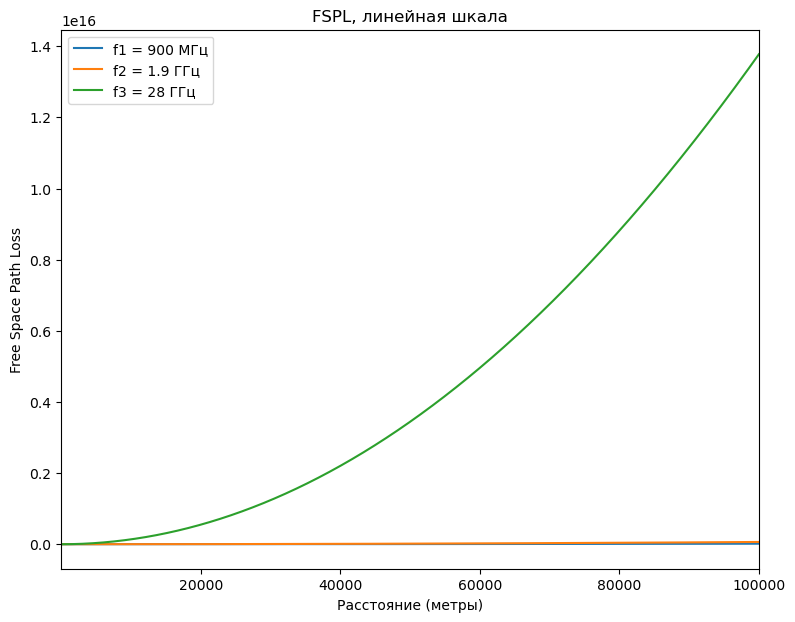

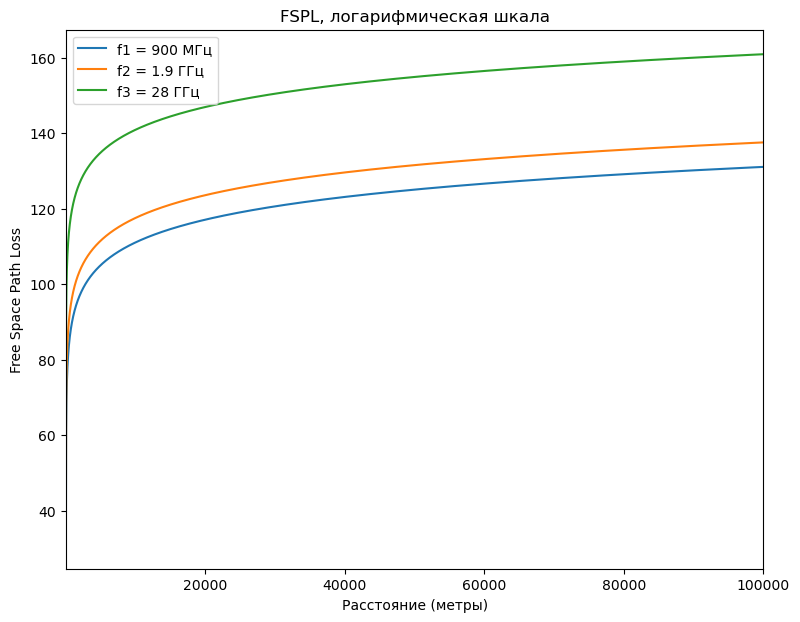

In [113]:
import numpy as np
import scipy.constants as spc
import matplotlib.pyplot as plt

def linear(d, f):
    return ((4.0 * np.pi * f * d) / spc.c)**2.0
def log(d, f):
    return 20 * np.log10(d) + 20 * np.log10(f) - 148

distances = np.linspace(1, 100000, 10000)
f1 = 900000000
f2 = 1900000000
f3 = 28000000000

plt.figure(figsize=(9,7))
plt.plot(distances, [linear(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [linear(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [linear(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("FSPL, линейная шкала")
plt.xlabel("Расстояние (метры)")
plt.ylabel("Free Space Path Loss")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

plt.figure(figsize=(9,7))
plt.plot(distances, [log(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [log(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [log(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("FSPL, логарифмическая шкала")
plt.xlabel("Расстояние (метры)")
plt.ylabel("Free Space Path Loss")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

**Дистанция уверенного приема**

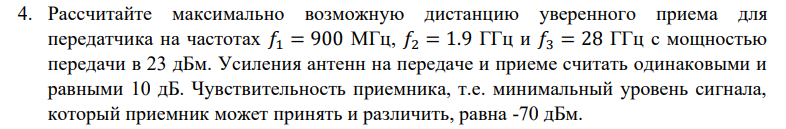

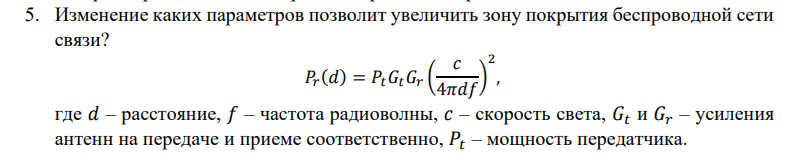

In [117]:
def calc(d, f, P, Gt, Gr):
    c = spc.c
    part1 = (c / (4 * np.pi * d * f))**2
    part2 = Gt * Gr * P
    formula = part1 * part2
    return 10 * np.log10(formula)

def maxd(distances, f, L, P, Gt, Gr):
    d = 0
    for i in distances:
        if calc(i, f, P, Gt, Gr) >= L:
            d = i
        else:
            break
    return d

P = 23
Gr = Gt = 10
L = -70

print("Макс дистанция для f = 900МГц: {}".format(maxd(distances, f1, L, P, Gt, Gr)))
print("Макс дистанция для f = 1.9ГГц: {}".format(maxd(distances, f2, L, P, Gt, Gr)))
print("Макс дистанция для f = 28ГГц: {}".format(maxd(distances, f3, L, P, Gt, Gr)))

Макс дистанция для f = 900МГц: 4011.3609360936093
Макс дистанция для f = 1.9ГГц: 1901.17101710171
Макс дистанция для f = 28ГГц: 121.01080108010801


**Стандартные модели распространения 3GPP**

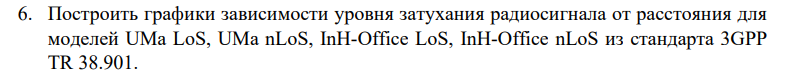

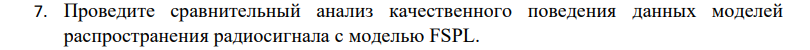

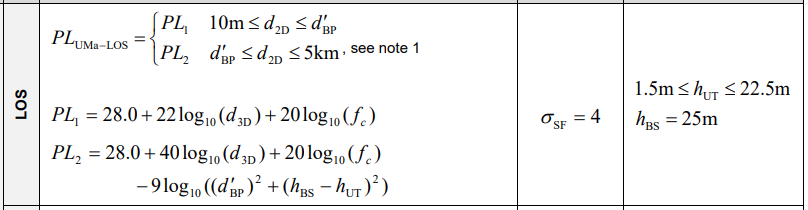

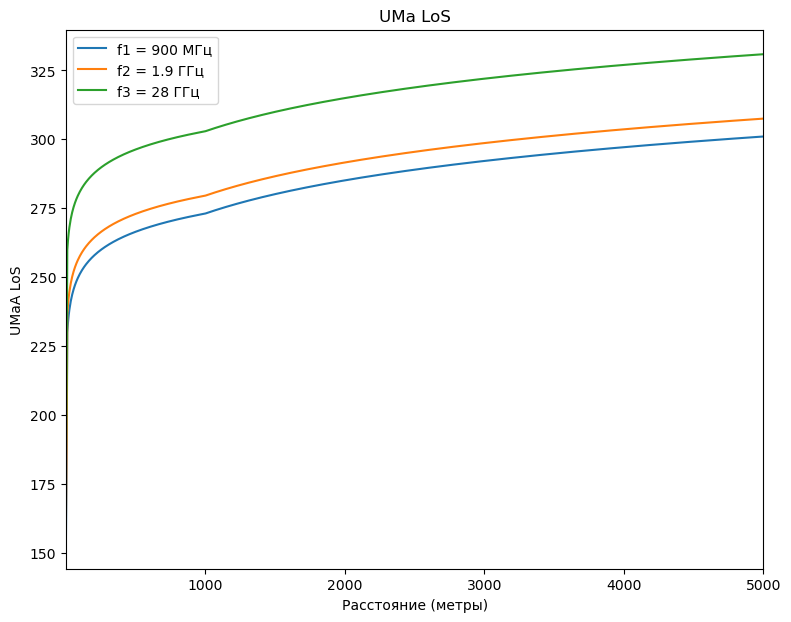

In [105]:
def UMa_LoS(d, fc):
    PL = 0
    dbp = 1000
    hbs = 25
    hut = 15
    if 10 <= d <= dbp:
        PL = 28.0 + 22*np.log10(d) + 20*np.log10(fc)
    else:
        PL = 28.0 + 40*np.log10(d) + 20*np.log10(fc) - 9*np.log10(dbp**2 + (hbs - hut)**2)
    return PL

distances = np.linspace(1, 5000, 1000)
f1 = 900000000
f2 = 1900000000
f3 = 28000000000

plt.figure(figsize=(9,7))
plt.plot(distances, [UMa_LoS(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [UMa_LoS(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [UMa_LoS(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("UMa LoS")
plt.xlabel("Расстояние (метры)")
plt.ylabel("UMaA LoS")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

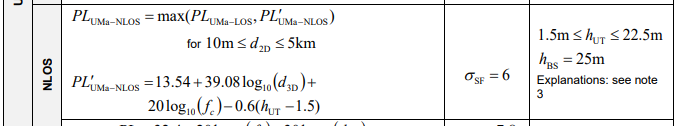

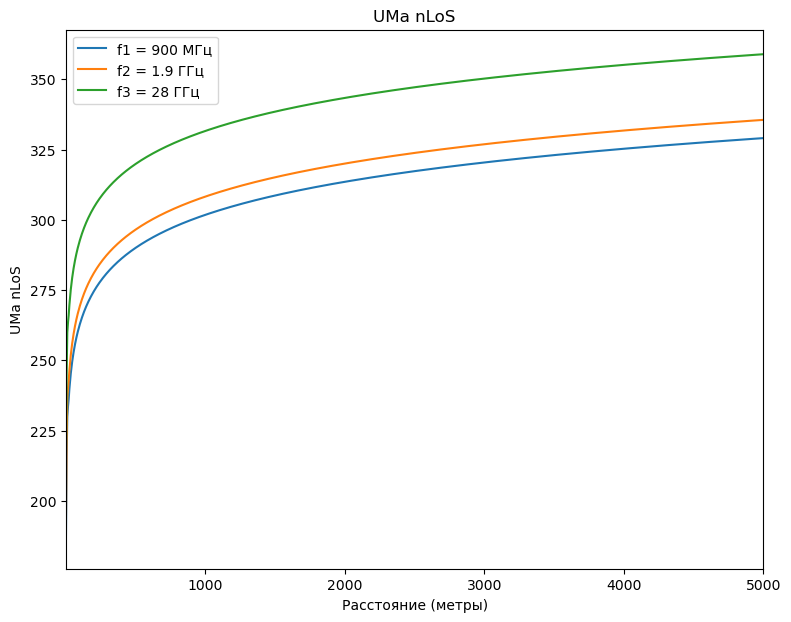

In [106]:
def UMa_nLoS(d, fc):
    hbs = 25
    hut = 15
    PLL = 13.54 + 39.08 * np.log10(d) + 20*np.log10(fc) - 0.6 * (hut - 1.5)
    PL = UMa_LoS(d, fc)
    if PL > PLL:
        return PL
    else:
        return PLL

plt.figure(figsize=(9,7))
plt.plot(distances, [UMa_nLoS(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [UMa_nLoS(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [UMa_nLoS(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("UMa nLoS")
plt.xlabel("Расстояние (метры)")
plt.ylabel("UMa nLoS")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

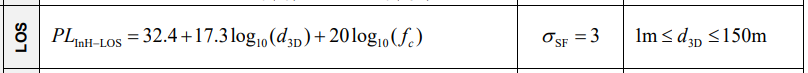

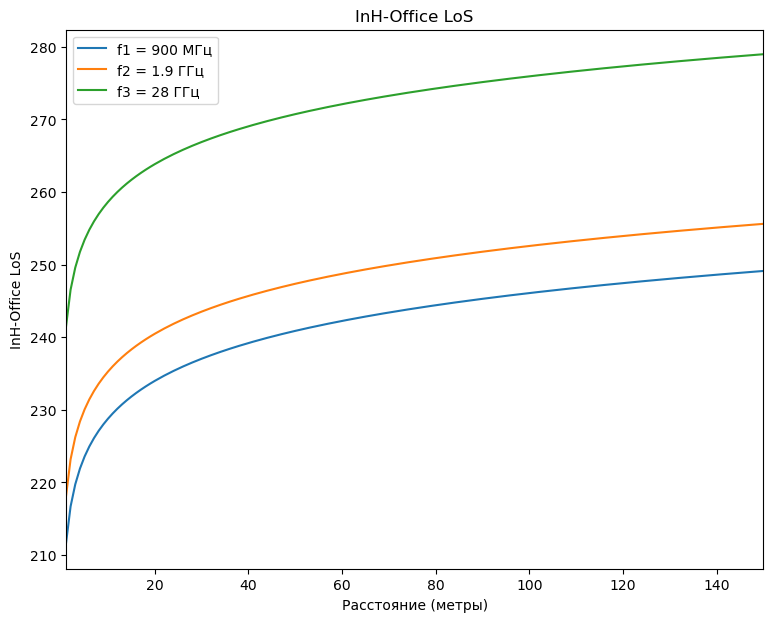

In [107]:
def InH_Office_LoS(d, fc):
    PL = 32.4 + 17.3*np.log10(d) + 20*np.log10(fc)
    return PL

distances = np.linspace(1, 150, 150)

plt.figure(figsize=(9,7))
plt.plot(distances, [InH_Office_LoS(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [InH_Office_LoS(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [InH_Office_LoS(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("InH-Office LoS")
plt.xlabel("Расстояние (метры)")
plt.ylabel("InH-Office LoS")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

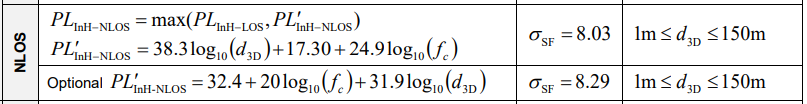

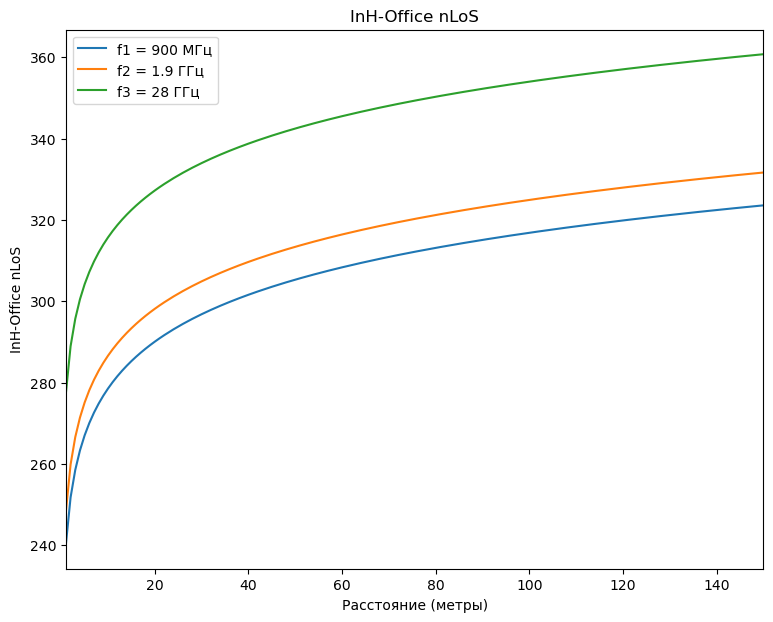

In [108]:
def InH_Office_nLoS(d, fc):
    PL = InH_Office_LoS(d, fc)
    PLL = 38.3*np.log10(d) + 17.3 + 24.9*np.log10(fc)
    if PL > PLL:
        return PL
    else:
        return PLL

distances = np.linspace(1, 150, 150)

plt.figure(figsize=(9,7))
plt.plot(distances, [InH_Office_nLoS(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [InH_Office_nLoS(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [InH_Office_nLoS(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("InH-Office nLoS")
plt.xlabel("Расстояние (метры)")
plt.ylabel("InH-Office nLoS")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()

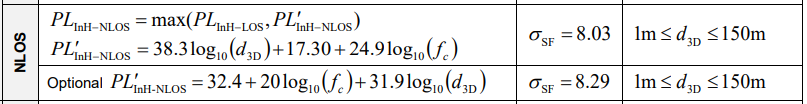

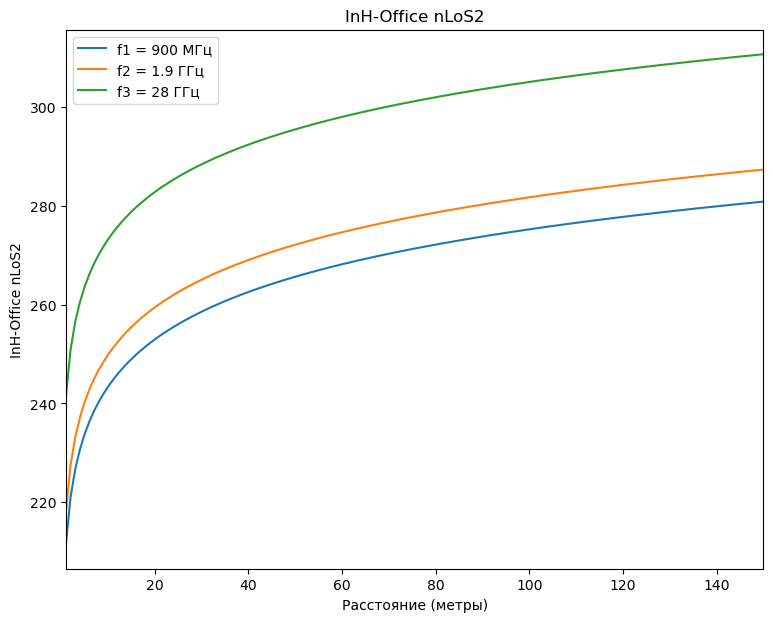

In [109]:
def InH_Office_nLoS2(d, fc):
    PL = InH_Office_LoS(d, fc)
    PLL = 32.4 + 20*np.log10(fc) + 31.9*np.log10(d)
    if PL > PLL:
        return PL
    else:
        return PLL

plt.figure(figsize=(9,7))
plt.plot(distances, [InH_Office_nLoS2(i, f1) for i in distances], label='f1 = 900 МГц')
plt.plot(distances, [InH_Office_nLoS2(i, f2) for i in distances], label='f2 = 1.9 ГГц')
plt.plot(distances, [InH_Office_nLoS2(i, f3) for i in distances], label='f3 = 28 ГГц')
plt.title("InH-Office nLoS2")
plt.xlabel("Расстояние (метры)")
plt.ylabel("InH-Office nLoS2")
plt.xlim(xmin=distances[0], xmax=distances[-1])
plt.legend()